# Web scraping

In this project, we are going to obtain and analyze data about Tesla's profit, which we will previously store in a DataFrame and in a sqlite database.

## Step 1: Install dependencies

Make sure you have the Python `pandas` and `requests` packages installed to be able to work on the project. In case you do not have the libraries installed, run them in the console:

```bash
pip install pandas requests
```

## Step 2: Download HTML

The download of the HTML of the web page will be done with the `requests` library, as we saw in the module theory.

The web page we want to scrape is the following: [https://ycharts.com/companies/TSLA/revenues](https://ycharts.com/companies/TSLA/revenues). It collects and stores information about the growth of the company every three months, since June 2009. It stores the text scraped from the web in some variable.

In [61]:
# Imports
import requests
import time
from bs4 import BeautifulSoup
import pandas as pd

In [62]:
# Select the resource to download
url = "https://ycharts.com/companies/TSLA/revenues"
# Modify request headers to make it appear that the request is coming from a legitimate browser
headers = {
    'User-Agent': 'Mozilla/5.0 (iPad; CPU OS 12_2 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15E148'
}

# Request to download the file from the internet
response = requests.get(url, headers=headers)
response
# If the request has been executed correcly (code 200), then the HTML content of the page has been downloaded

<Response [200]>

## Step 3: Transform the HTML

The next step to start extracting the information is to transform it into a structured object. Do this using `BeautifulSoup`. Once you have interpreted the HTML correctly, parse it to:

1. Find all the tables.
2. Find the table with the quarterly evolution.
3. Store the data in a DataFrame.

In [63]:

if response:
    # We transform the flat HTML into real HTML
    soup = BeautifulSoup(response.text, 'html')
    soup



In [64]:
# Show content by response
response.content

b'\n\n\n\n\n\n\n\n\n<!doctype html>\n<html lang="en" ng-jq>\n    <head>\n        <title>\n        Tesla Revenue (Quarterly) Analysis | YCharts\n        </title>\n\n        <meta name="viewport" content="width=device-width, initial-scale=1.0" />\n<!-- This code allows us to correctly display the page on mobile devices -->\n<script defer>\n    var viewport = document.querySelector(\'meta[name=viewport]\');\n    if (viewport) {\n        var minWidth = 700;\n        if (screen.width < minWidth) {\n            document.head.removeChild(viewport);\n            var newViewport = document.createElement(\'meta\');\n            newViewport.setAttribute(\'name\', \'viewport\');\n            newViewport.setAttribute(\'content\', \'width=\' + minWidth);\n            document.head.appendChild(newViewport);\n        }\n    }\n</script>\n\n\n        \n        <script>\n    if (navigator.userAgent.indexOf(\'Trident\') !== -1 || navigator.userAgent.indexOf(\'MSIE\') !== -1) {\n        window.onload=func

In [65]:
# Find the table with the quarterly evolution
table = soup.find("table")
rows = table.find_all("tr")
data = []

for row in rows:
    cells = row.find_all(["td", "th"])
    cells = [cell.get_text(strip = True) for cell in cells]
    data.append(cells)
data

[['Date', 'Value'],
 ['June 30, 2024', '25.50B'],
 ['March 31, 2024', '21.30B'],
 ['December 31, 2023', '25.17B'],
 ['September 30, 2023', '23.35B'],
 ['June 30, 2023', '24.93B'],
 ['March 31, 2023', '23.33B'],
 ['December 31, 2022', '24.32B'],
 ['September 30, 2022', '21.45B'],
 ['June 30, 2022', '16.93B'],
 ['March 31, 2022', '18.76B'],
 ['December 31, 2021', '17.72B'],
 ['September 30, 2021', '13.76B'],
 ['June 30, 2021', '11.96B'],
 ['March 31, 2021', '10.39B'],
 ['December 31, 2020', '10.74B'],
 ['September 30, 2020', '8.771B'],
 ['June 30, 2020', '6.036B'],
 ['March 31, 2020', '5.985B'],
 ['December 31, 2019', '7.384B'],
 ['September 30, 2019', '6.303B'],
 ['June 30, 2019', '6.35B'],
 ['March 31, 2019', '4.541B'],
 ['December 31, 2018', '7.226B'],
 ['September 30, 2018', '6.824B'],
 ['June 30, 2018', '4.002B']]

## Step 4: Process the DataFrame

Next, clean up the rows to get clean values by removing `$` and commas. Remove also those that are empty or have no information.

In [66]:
df = pd.DataFrame(data)

# Extract row[0]
my_columns = df.loc[0, :].to_list()
df.columns = my_columns

# Show less row [0]
df = df[1:]
df

# Create a new DF clean
clean_df = df.copy()
clean_df



,Date,Value
1,"June 30, 2024",25.50B
2,"March 31, 2024",21.30B
3,"December 31, 2023",25.17B
4,"September 30, 2023",23.35B
5,"June 30, 2023",24.93B
6,"March 31, 2023",23.33B
7,"December 31, 2022",24.32B
8,"September 30, 2022",21.45B
9,"June 30, 2022",16.93B
10,"March 31, 2022",18.76B


In [67]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 1 to 25
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    25 non-null     object
 1   Value   25 non-null     object
dtypes: object(2)
memory usage: 532.0+ bytes


In [68]:
# Clean column per column
clean_df['Date'] = pd.to_datetime(clean_df['Date'])
clean_df['Value'] = clean_df['Value'].str.replace("B", "")
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 1 to 25
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    25 non-null     datetime64[ns]
 1   Value   25 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 532.0+ bytes


In [69]:
# Show Data Frame Clean
clean_df

,Date,Value
1,2024-06-30,25.50
2,2024-03-31,21.30
3,2023-12-31,25.17
4,2023-09-30,23.35
5,2023-06-30,24.93
6,2023-03-31,23.33
7,2022-12-31,24.32
8,2022-09-30,21.45
9,2022-06-30,16.93
10,2022-03-31,18.76


## Step 5: Store the data in sqlite

Create an empty instance of the database and include the clean data in it, as we saw in the database module. Once you have an empty database:

1. Create the table.
2. Insert the values.
3. Store (`commit`) the changes.

In [70]:
import os
from sqlalchemy import create_engine
from sqlalchemy import text
import pandas as pd
from dotenv import load_dotenv
import sqlite3
# load the .env file variables
load_dotenv()

True

In [71]:
con = sqlite3.connect("tesla_revenue.db")

In [72]:
# Create the table
con.execute("""CREATE TABLE IF NOT EXISTS tesla_revenue (Date DATE, Value REAL)""")
con.commit()

In [73]:
# con.executemany("""INSERT INTO tesla_revenue(Date, Value) VALUES (?, ?)""", clean_df)

clean_df.to_sql("tesla_revenue", con, if_exists="append", index=False)
con.commit()

In [74]:
# Show
for row in con.execute("""SELECT * FROM tesla_revenue"""):
    print(row)

('2024-06-30 00:00:00', '25.50')
('2024-03-31 00:00:00', '21.30')
('2023-12-31 00:00:00', '25.17')
('2023-09-30 00:00:00', '23.35')
('2023-06-30 00:00:00', '24.93')
('2023-03-31 00:00:00', '23.33')
('2022-12-31 00:00:00', '24.32')
('2022-09-30 00:00:00', '21.45')
('2022-06-30 00:00:00', '16.93')
('2022-03-31 00:00:00', '18.76')
('2021-12-31 00:00:00', '17.72')
('2021-09-30 00:00:00', '13.76')
('2021-06-30 00:00:00', '11.96')
('2021-03-31 00:00:00', '10.39')
('2020-12-31 00:00:00', '10.74')
('2020-09-30 00:00:00', '8.771')
('2020-06-30 00:00:00', '6.036')
('2020-03-31 00:00:00', '5.985')
('2019-12-31 00:00:00', '7.384')
('2019-09-30 00:00:00', '6.303')
('2019-06-30 00:00:00', '6.35')
('2019-03-31 00:00:00', '4.541')
('2018-12-31 00:00:00', '7.226')
('2018-09-30 00:00:00', '6.824')
('2018-06-30 00:00:00', '4.002')
('2024-06-30 00:00:00', '25.50')
('2024-03-31 00:00:00', '21.30')
('2023-12-31 00:00:00', '25.17')
('2023-09-30 00:00:00', '23.35')
('2023-06-30 00:00:00', '24.93')
('2023-03-3

In [75]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 1 to 25
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    25 non-null     datetime64[ns]
 1   Value   25 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 532.0+ bytes


## Step 6: Visualize the data

What types of visualizations can we make? Suggest at least 3 and plot them.

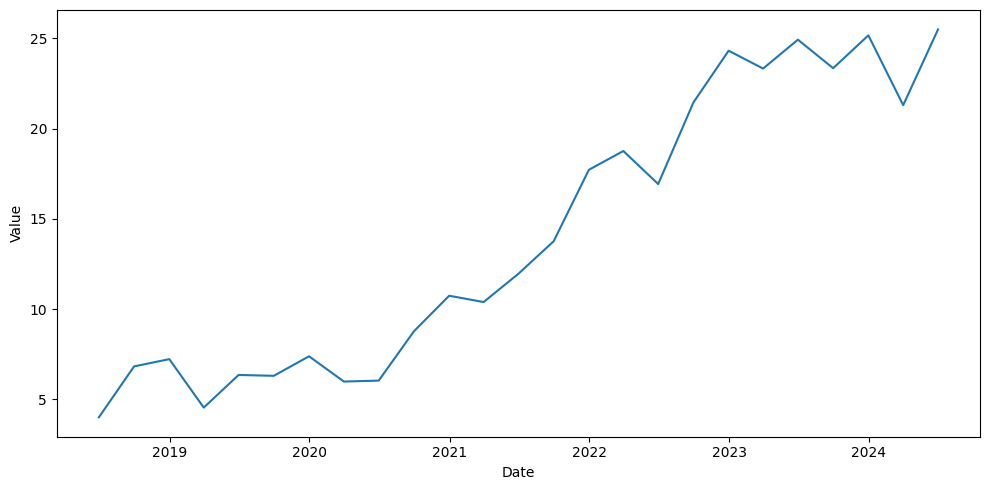

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(figsize = (10, 5))

clean_df['Value'] = clean_df['Value'].astype('float')
sns.lineplot(data= clean_df, x= 'Date', y= 'Value')

plt.tight_layout()
plt.show()

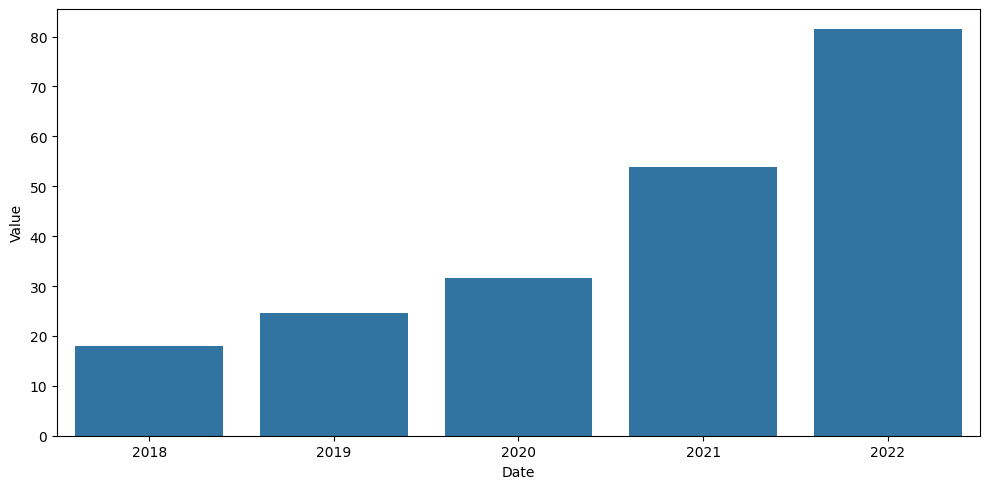

In [78]:
fig, axis = plt.subplots(figsize = (10, 5))

clean_df["Date"] = pd.to_datetime(clean_df["Date"])
tesla_revenue_yearly = clean_df.groupby(clean_df["Date"].dt.year)["Value"].sum().reset_index()
sns.barplot(data = tesla_revenue_yearly[tesla_revenue_yearly["Date"] < 2023], x= "Date", y= "Value")

plt.tight_layout()

plt.show()

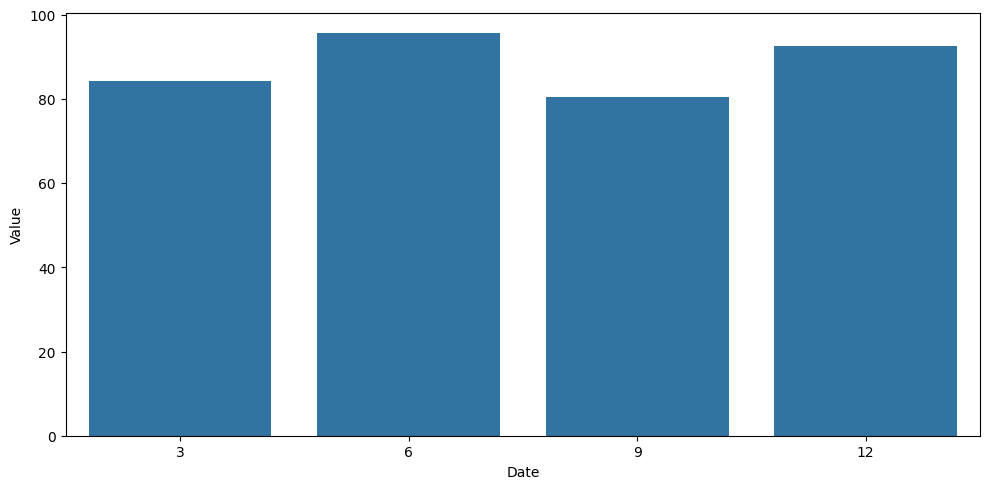

In [85]:
fig, axis = plt.subplots(figsize = (10, 5))

clean_df["Date"] = pd.to_datetime(clean_df["Date"])
tesla_revenue_monthly = clean_df.groupby(clean_df["Date"].dt.month)["Value"].sum().reset_index()
sns.barplot(data = tesla_revenue_monthly, x= "Date", y= "Value")

plt.tight_layout()

plt.show()